<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/NLP_Sentiment_Analysis_Project_8_10PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP (Natural Language Processing) Sentiment Anaysis Project**
Natural Language Processing (NLP) is a branch of artificial intelligence that allows computers to understand, interpret, and generate human language. In Python, NLP is used to extract meaning from text data, and it's a popular choice because of the many libraries and frameworks available.


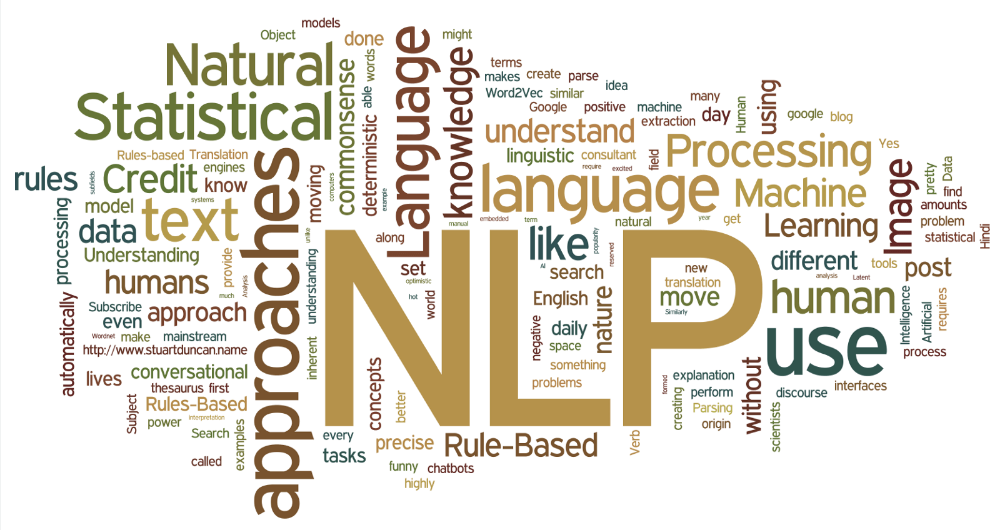

# **Load Libraries**

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [2]:
#load dataset
from google.colab import files
uploaded = files.upload()


Saving Instruments_Reviews.csv to Instruments_Reviews.csv


In [3]:
df=pd.read_csv('Instruments_Reviews.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


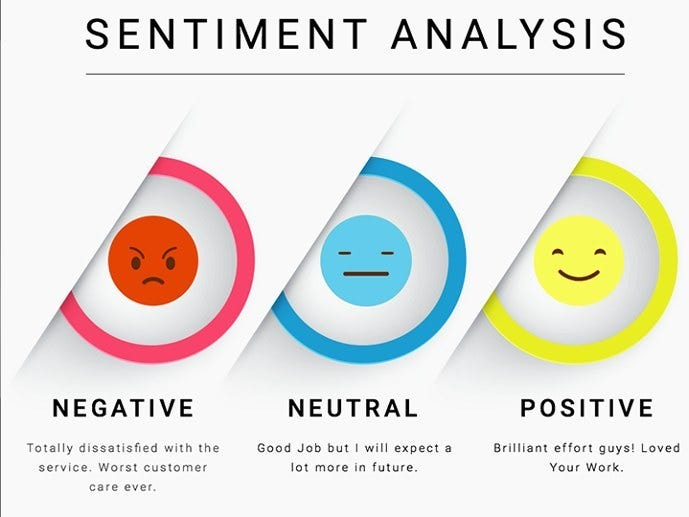

# **Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [4]:
#Filling Missing Values
df.reviewText.fillna(value="",inplace=True)


In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [5]:
df.reviewerName.fillna(value="Unknown",inplace=True)

In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,0
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


**Concatenate Columns**

In [6]:
df['Reviews']=df['reviewText']+" "+df['summary']
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [7]:
#drop columns
df.drop(['reviewText','summary'],axis=1,inplace=True)


In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [ ]:
df.overall.value_counts()

,count
overall,
5.0,6938
4.0,2084
3.0,772
2.0,250
1.0,217


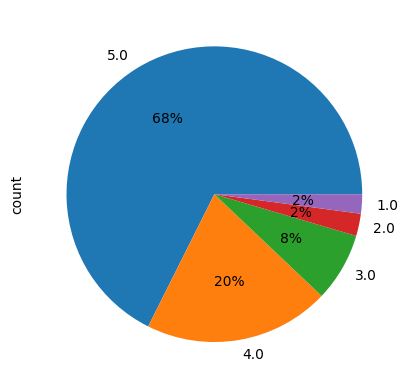

In [8]:
#Visulaise the the overall raing using pie chart
df.overall.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()


In [9]:
#Labeling the with positive Negative Neutral
def Lebelling(x):
  if x>3:
    return 'Positive'
  elif x<3:
    return 'Negative'
  else:
    return 'Neutral'


In [10]:
df['Sentiment']=df['overall'].apply(Lebelling)

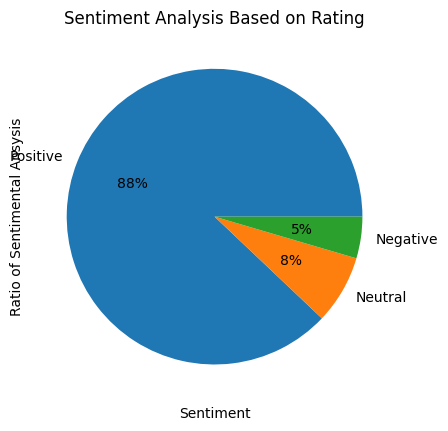

In [11]:
#Visualise with the help of chart sentiment
df['Sentiment'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Sentiment Analysis Based on Rating')
plt.xlabel('Sentiment')
plt.ylabel('Ratio of Sentimental Ansysis')
plt.show()

# **Text Preprocessing**

In [12]:
#import string
import string
import re
#text cleaning
def Text_Cleaning(text):
  #lowercase the text
  text=text.lower()

  #cleaning punctuations
  punc=str.maketrans(string.punctuation,' '*len(string.punctuation))
  text=text.translate(punc)

  #remove numbers in text
  text=re.sub(r'\d+','',text)

  #romove possible hyperlink
  text=re.sub('https?://\S+|www\.\S+',' ',text)

  #delete newline
  text=re.sub('\n','',text)

  return text




# **Stopwords**
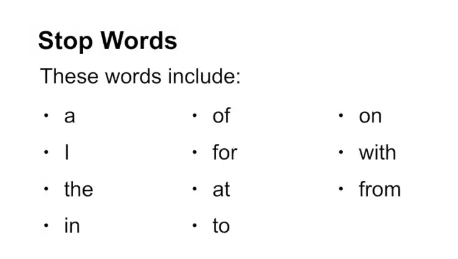

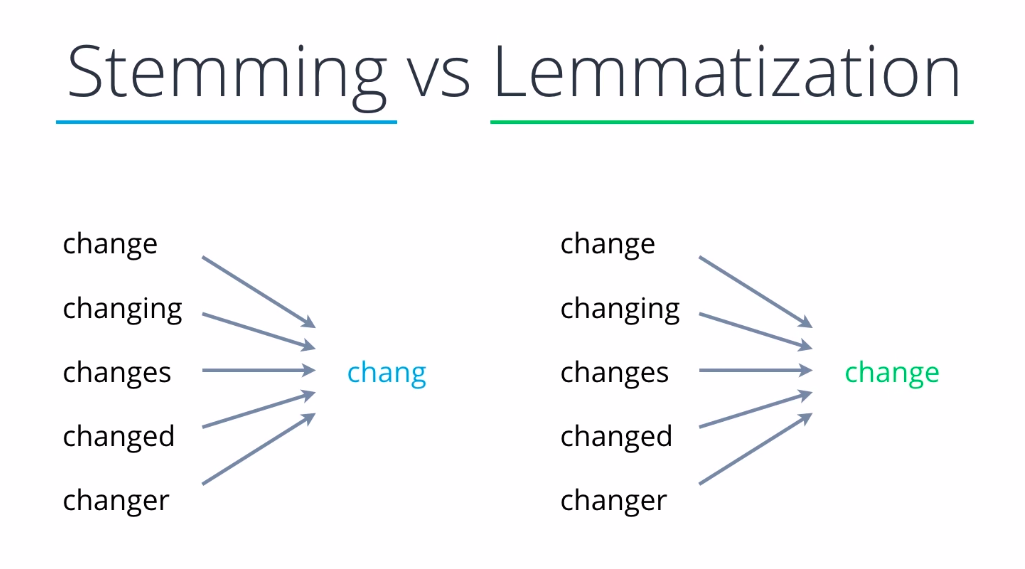

In [13]:
#Text processing

#import lemmatization
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

def Text_processing(text):
  process_text=list()
  lemmatizer=WordNetLemmatizer()

  #token of words
  token=nltk.word_tokenize(text)

  for word in token:
    if word not in stopwords:
      process_text.append(lemmatizer.lemmatize(word))
  return (" ".join(process_text))




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
#Apply the function
df['Reviews']=df['Reviews'].apply(Text_Cleaning)
df['Reviews']=df['Reviews'].apply(Text_processing)

In [15]:
df['Reviews']

,Reviews
0,much write exactly supposed filter pop sound r...
1,product exactly quite affordable realized doub...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pop ...
4,pop filter great look performs like studio fil...
...,...
10256,great expected thank five star
10257,thinking trying nanoweb string bit put high pr...
10258,tried coated string past including elixir neve...
10259,well made elixir developed taylor guitar strin...


In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",much write exactly supposed filter pop sound r...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable realized doub...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive


# **Polarity**

Polarity in Natural Language Processing (NLP) refers to the sentiment or opinion expressed in a text, such as a social media post or user review. Polarity classification is the process of analyzing and categorizing this sentiment as positive, negative, or neutral

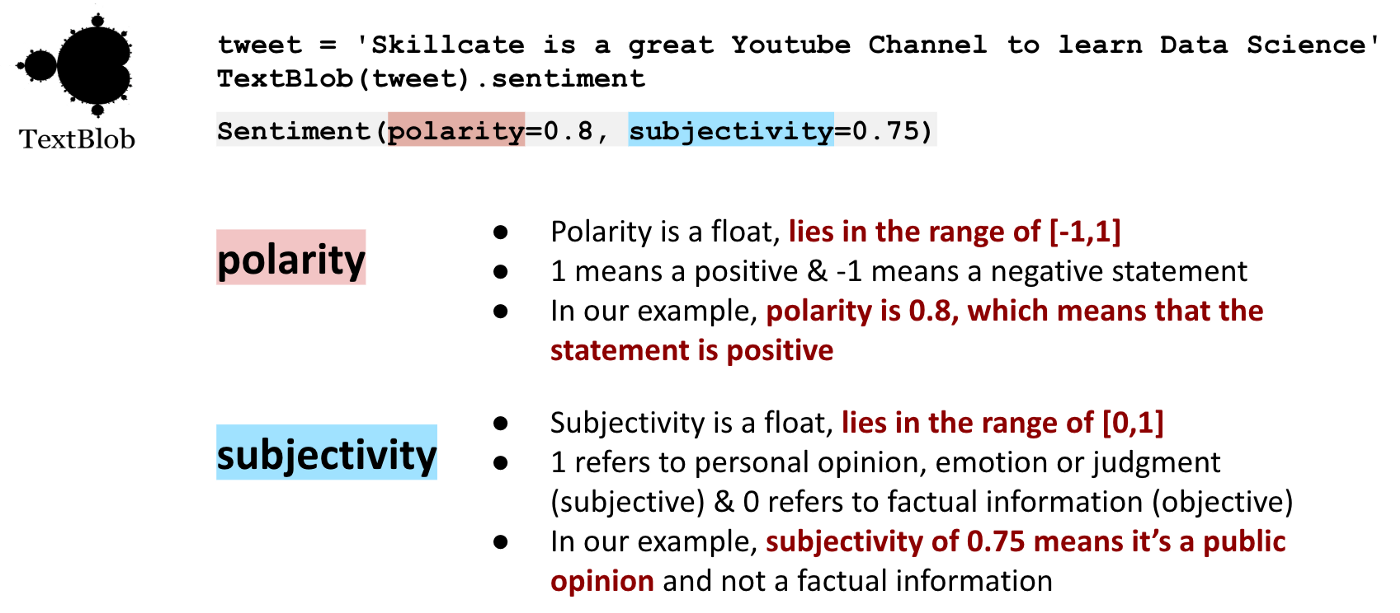

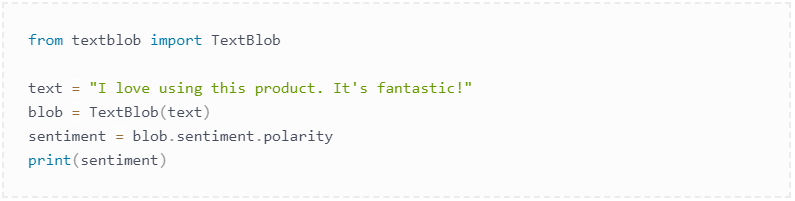

In [16]:
#Explample
import textblob
from textblob import TextBlob

text='I love using this product. It is fantastic!'
blob=TextBlob(text)

print(blob.sentiment)

Sentiment(polarity=0.5, subjectivity=0.75)


In [17]:
import textblob
from textblob import TextBlob

df['polarity']=df['Reviews'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [18]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews,Sentiment,polarity
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",much write exactly supposed filter pop sound r...,Positive,0.4000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable realized doub...,Positive,0.0000
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive,0.1675
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive,0.4250
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive,0.8000


<Axes: ylabel='Frequency'>

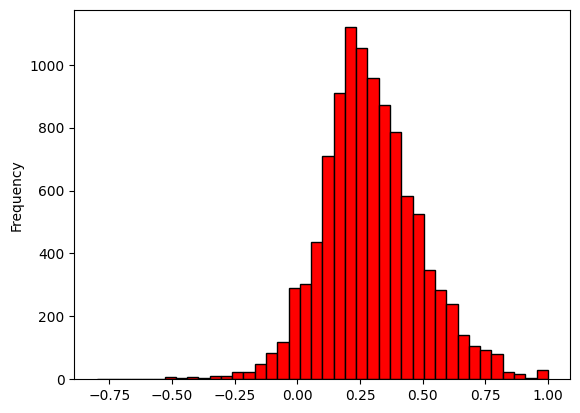

In [23]:
#visualise data into histogram
df['polarity'].plot(kind='hist',bins=40,color='red',linewidth=1,edgecolor='black')

**Length of Reviews**

In [27]:
df['length']=df['Reviews'].apply(len)

In [28]:
df.head(3)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews,Sentiment,polarity,length
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",much write exactly supposed filter pop sound r...,Positive,0.4000,150
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable realized doub...,Positive,0.0000,329
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive,0.1675,296


<Axes: ylabel='Frequency'>

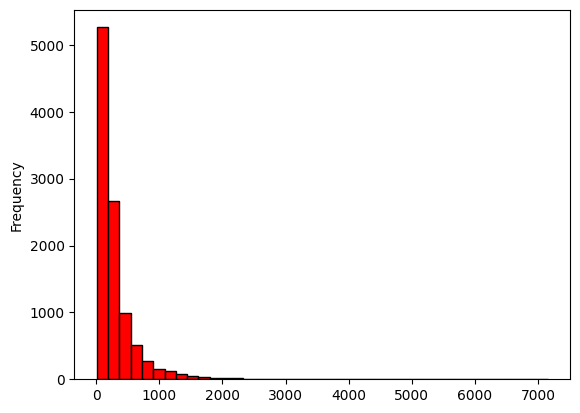

In [26]:
#visualise length of reviews using histogram chart
df['length'].plot(kind='hist',bins=40,color='red',linewidth=1,edgecolor='black')

# **Count the Words**

In [29]:
#count the words
df['word_count']=df['Reviews'].apply(lambda x:len(str(x).split()))

In [30]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews,Sentiment,polarity,length,word_count
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",much write exactly supposed filter pop sound r...,Positive,0.4000,150,24
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable realized doub...,Positive,0.0000,329,52
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive,0.1675,296,45
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive,0.4250,169,23
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive,0.8000,114,18


<Axes: ylabel='Frequency'>

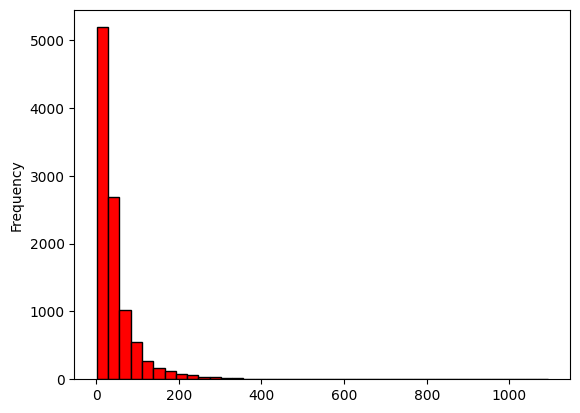

In [40]:
#visulise the word count
df['word_count'].plot(kind='hist',bins=40,color='red',linewidth=1,edgecolor='black')

## **Word cloud of revies with Positive Sentiments**

In [46]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews,Sentiment,polarity,length,word_count
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",much write exactly supposed filter pop sound r...,Positive,0.4000,150,24
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable realized doub...,Positive,0.0000,329,52
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive,0.1675,296,45
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive,0.4250,169,23
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive,0.8000,114,18


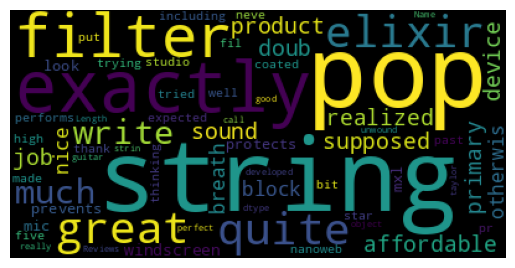

In [45]:

#visualise data using wordcloud
from wordcloud import WordCloud
wordcloud=WordCloud(max_words=100,width=400,height=200).generate(str(df[df['Sentiment']=='Positive']['Reviews']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

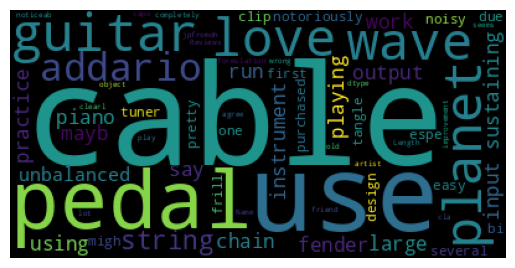

In [47]:
#world cloud show the neutral review
wordcloud=WordCloud(max_words=100,width=400,height=200).generate(str(df[df['Sentiment']=='Neutral']['Reviews']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#

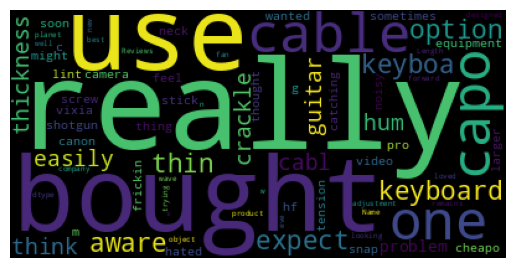

In [48]:
#visualise the negative words
wordcloud=WordCloud(max_words=100,width=400,height=200).generate(str(df[df['Sentiment']=='Negative']['Reviews']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#